In [23]:
import numpy as np
import pandas as pd

In [24]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


**PREPROCESS THE DATA SET**

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


**EDA**

In [ ]:
import matplotlib.pyplot as plt

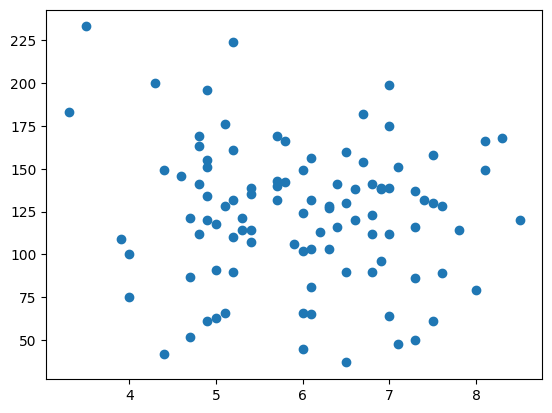

In [ ]:
plt.scatter(df['cgpa'], df['iq'])

**FEATURE SELECTION**

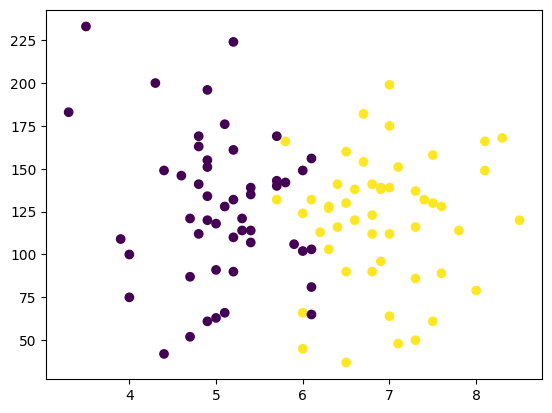

In [ ]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

we will use Logistic Regression algo to solve this problem

**EXTRACT INPUT & OUTPUT COLS**

In [25]:
x = df.iloc[:,0:2]
y = df.iloc[:, -1]

In [26]:
x

,Unnamed: 0,cgpa
0,0,6.8
1,1,5.9
2,2,5.3
3,3,7.4
4,4,5.8
...,...,...
95,95,4.3
96,96,4.4
97,97,6.7
98,98,6.3


In [27]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


**Train split test**

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [30]:
x_train

,Unnamed: 0,cgpa
91,91,7.5
59,59,4.8
51,51,4.8
7,7,5.0
97,97,6.7
...,...,...
69,69,8.5
65,65,8.1
73,73,4.9
64,64,7.0


In [31]:
y_train

,placement
91,1
59,0
51,0
7,0
97,1
...,...
69,1
65,1
73,0
64,1


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
x_train = scaler.fit_transform(x_train)

In [35]:
x_train

array([[ 1.36402249,  1.38834584],
       [ 0.25836958, -1.08684153],
       [-0.01804364, -1.08684153],
       [-1.53831638, -0.90349432],
       [ 1.5713324 ,  0.65495699],
       [ 1.5022291 , -1.54520957],
       [ 1.46767745, -1.17851514],
       [-0.39811183, -0.99516793],
       [ 1.60588406,  0.28826256],
       [ 0.32747289,  1.20499863],
       [-1.40010977,  0.8383042 ],
       [-0.95093828, -1.17851514],
       [-1.1582482 , -1.82023039],
       [-1.50376473,  0.10491535],
       [-1.29645481,  0.10491535],
       [-1.26190316, -0.81182072],
       [-0.1216986 ,  0.56328338],
       [ 0.05105967,  2.12173469],
       [ 0.81119603, -1.08684153],
       [-0.29445687,  0.7466306 ],
       [ 0.84574769, -0.99516793],
       [ 0.9839543 , -0.99516793],
       [ 0.12016297,  1.66336666],
       [-0.08714695, -0.5367999 ],
       [-1.57286803, -0.26177908],
       [-0.46721513,  0.47160978],
       [-0.88183497,  0.92997781],
       [ 0.29292124,  0.8383042 ],
       [-0.98548993,

In [36]:
x_test = scaler.transform(x_test)

In [37]:
x_test

array([[-0.25990521,  1.38834584],
       [ 0.88029934,  1.20499863],
       [-1.19279985, -2.46194563],
       [-1.71107465, -0.6284735 ],
       [-0.57087009,  0.7466306 ],
       [-1.43466142,  0.01324174],
       [-0.05259529, -2.27859842],
       [-0.74362836,  1.48001945],
       [-1.05459324,  1.02165141],
       [-0.84728332,  0.01324174]])

**Train the model**

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
clf = LogisticRegression()

In [40]:
#model training
clf.fit(x_train, y_train)

LogisticRegression()

**Evaluate the model**

In [43]:
y_pred = clf.predict(x_test)

In [46]:
y_pred

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0])

In [42]:
y_test

,placement
44,1
77,1
17,0
2,0
35,1
10,1
50,0
30,1
21,1
27,1


In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test, y_pred)

0.8

Visualising the pattern made my ML model

In [50]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

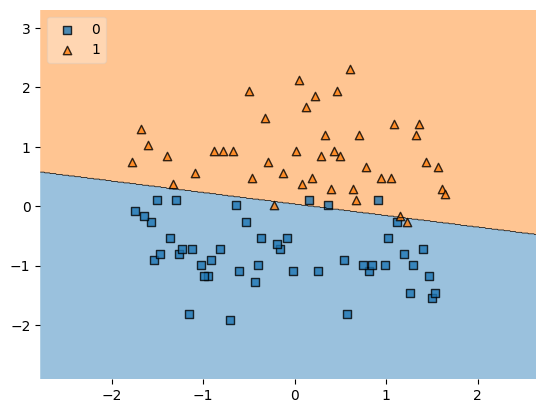

In [52]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [53]:
import pickle

In [55]:
pickle.dump(clf,open('model.pkl','wb'))